In [1]:
import matplotlib.pyplot as plt
from plots.mpltoolkit import named_colors, load_mpl_presets, fancy_legend, mpl_loc
import numpy as np
import vice
load_mpl_presets()

/Users/astrobeard/Work/Research/VICErepos/VICE/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


# If the increase in the specific SN Ia rate at low stellar mass is purely a metallicity effect, what is the binary fraction as a function of metallicity?

For argument's sake, entertain the notion that the increase in the SN Ia rate per unit stellar mass for small galaxies is purely a consequence of the metallicity-dependent binary fraction and the mass-metallicity relation:

$$\frac{N_\text{Ia}(Z)}{M_\star} \sim \frac{N_\text{binary}(Z)}{M_\star} \sim b(Z)$$

[Brown et al. (2019)](https://ui.adsabs.harvard.edu/abs/2019MNRAS.484.3785B/abstract) report that $N_\text{Ia}/M_\star \sim M_\star^{-0.5}$, and [Andrews & Martini (2013)](https://ui.adsabs.harvard.edu/abs/2013ApJ...765..140A/abstract) report that $Z_\text{O} \sim M_\star^{0.5}$ up to $M_\star \approx 10^{8.9} M_\odot$, after which the mass-metallicity relation flattens off. For the sake of this calculation, we'll assume a uniform slope but consider a few different values (i.e. $Z_\text{O} \sim M_\star^{\alpha}$).

Using the mass metallicity-relation from Andrews & Martini (2013) to turn the specific SN Ia rate as a function of mass from Brown et al. (2019) into a metallicity-dependence yields

$$b(Z) \sim M_\star^{-0.5} \sim (Z_\text{O}^{1/\alpha})^{-0.5} = Z_\text{O}^{-0.5/\alpha}$$

For the purposes of this I'll assume [O/H] = [Fe/H] = $\log_{10}(Z/Z_\odot)$ (i.e. metallicity is just one number; this implicitly assumes that alpha enhancement doesn't play much of a role in binary fractions, but [Mazzola et al. 2020](https://ui.adsabs.harvard.edu/abs/2020MNRAS.499.1607M/abstract) emphasize that the binary fraction **does** depend on [$\alpha$/Fe] at fixed [Fe/H], with more alpha-enhanced stars showing less multiplicity). Putting this in logarithmic units:

$$Z_\text{O} = Z_\odot 10^{[O/H]} \rightarrow Z_\odot 10^{\log_{10}(Z/Z_\odot)}$$

and then:

$$b(Z) \sim (Z_\odot 10^{\log_{10}(Z/Z_\odot)})^{-0.5/\alpha} \sim 10^{(-0.5/\alpha)\log_{10}(Z/Z_\odot)}$$

Below is a figure demonstrating how this looks for a few values of $\alpha$. For comparison, [Moe, Kratter & Badenes (2019)](https://ui.adsabs.harvard.edu/abs/2019ApJ...875...61M/abstract) report 53% $\pm$ 12%, 40% $\pm$ 6%, 24% $\pm$ 4%, and 10% $\pm$ 3% at [Fe/H] = -3, -1, -0.2, and +0.5, respetively, from the APOGEE RV variables. For this calculation, I'll also just assume the normalization of the binary fraction at [Fe/H] = 0 of 10% as derived by Moe, Kratter & Badenes (2019).

By comparing the predictions of these back-of-the-envelope calculations, it's already rather obvious that in order to explain the steep increase in the specific SN Ia rate with decreasing galaxy mass, the binary fraction needs to rise much more quickly than Moe, Kratter & Badenese (2019) find for APOGEE binaries. Beyond that, the binary fraction is required to exceed 1 at [Fe/H] $\lesssim -1$, depending on the adopted slope of the mass-metallicity relation, which is unphysical.

By comparing the predictions of these back-of-the-envelope calculations, we can get a sense of how plausible it is to assert that a metallicity-dependent binary fraction is the primary driver of the increase in the specific SN Ia rate at low galaxy masses.

<!-- <span style="color:red">TODO:</span> -->

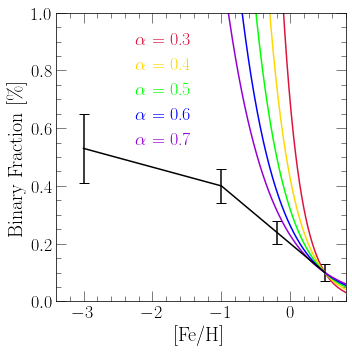

In [2]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("[Fe/H]")
ax.set_ylabel("Binary Fraction [\%]")
ax.set_xlim([-3.4, 0.8])
ax.set_ylim([0, 1])
xvals = [-3, -1, -0.2, +0.5]
yvals = [0.53, 0.40, 0.24, 0.1]
yerrs = [0.12, 0.06, 0.04, 0.03]
kwargs = {
    "c": named_colors()["black"],
    "yerr": yerrs
}
ax.errorbar(xvals, yvals, **kwargs)

class inverse_z_scaling:
    
    def __init__(self, alpha = 0.5):
        self.alpha = alpha
        
    def __call__(self, logz):
        return 0.1 * 10**( -0.5 / self.alpha * (logz - 0.5))

del kwargs["yerr"]
alphas = [0.3, 0.4, 0.5, 0.6, 0.7]
colors = ["crimson", "gold", "lime", "blue", "darkviolet"]
xvals = np.linspace(ax.get_xlim()[0], ax.get_ylim()[1], 1000)
for i in range(len(alphas)):
    scaling = inverse_z_scaling(alpha = alphas[i])
    yvals = [scaling(_) for _ in xvals]
    kwargs["c"] = named_colors()[colors[i]]
    kwargs["label"] = r"$\alpha$ = %g" % (alphas[i])
    ax.plot(xvals, yvals, **kwargs)
    
kwargs = {
    "ncol": 1,
    "frameon": False,
    "loc": mpl_loc("upper left"),
    "bbox_to_anchor": (0.2, 0.99),
    "handlelength": 0,
}
leg = ax.legend(**kwargs)
fancy_legend(leg, colors)

plt.tight_layout()
plt.show()

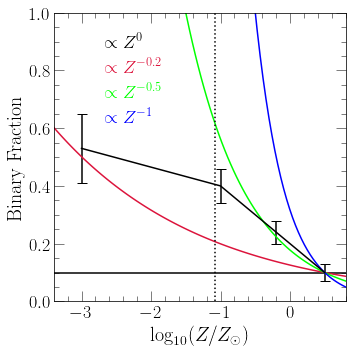

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel(r"$\log_{10}(Z / Z_\odot)$")
ax.set_ylabel("Binary Fraction")
ax.set_xlim([-3.4, 0.8])
ax.set_ylim([0, 1])
xvals = [-3, -1, -0.2, +0.5]
yvals = [0.53, 0.40, 0.24, 0.1]
yerrs = [0.12, 0.06, 0.04, 0.03]
kwargs = {
    "c": named_colors()["black"],
    "yerr": yerrs
}
ax.errorbar(xvals, yvals, **kwargs)

class z_scaling:
    
    def __init__(self, index):
        self.index = index
        
    def __call__(self, logz):
        z = 10**logz
        return z**(self.index)
    
indeces = [0, -0.2, -0.5, -1]
colors = ["black", "crimson", "lime", "blue"]
for i in range(len(indeces)):
    base = 0.1 # At log10(Z / Zsun) = +0.5
    xvals = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 100)
    scaling = z_scaling(indeces[i])
    yvals = []
    for j in range(len(xvals)): yvals.append(base * scaling(xvals[j] - 0.5))
    kwargs = {
        "c": named_colors()[colors[i]],
        "label": r"$\propto Z^{%g}$" % (indeces[i])
    }
    ax.plot(xvals, yvals, **kwargs)
    
kwargs = {
    "loc": mpl_loc("upper left"),
    "bbox_to_anchor": (0.1, 0.98),
    "handlelength": 0
}
leg = ax.legend(**kwargs)
fancy_legend(leg, colors)

ax.axvline(-1.08, c = named_colors()["black"], linestyle = ':')

plt.tight_layout()
for ext in ["pdf", "jpeg"]:
    kwargs = {}
    if ext == "jpeg": kwargs["dpi"] = 200
    plt.savefig("binaries_zscaling.%s" % (ext), **kwargs)
plt.show()